In [ ]:
import os
import json
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/ageitgey/face_recognition.git

Cloning into 'face_recognition'...
remote: Enumerating objects: 972, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 972 (delta 0), reused 0 (delta 0), pack-reused 969
Receiving objects: 100% (972/972), 101.49 MiB | 14.11 MiB/s, done.
Resolving deltas: 100% (559/559), done.


In [ ]:
!ls face_recognition/

AUTHORS.rst	    HISTORY.rst		README_Simplified_Chinese.md
CONTRIBUTING.rst    LICENSE		requirements_dev.txt
docker		    Makefile		requirements_docs.txt
docker-compose.yml  MANIFEST.in		requirements.txt
Dockerfile	    pyproject.toml	setup.cfg
Dockerfile.gpu	    README_Japanese.md	setup.py
docs		    README_Korean.md	tests
examples	    README.md		tox.ini
face_recognition    README.rst


In [ ]:
import cv2 #필요한 라이브러리 
#import face_recognition
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img2 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/001_00.png')
img2 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/002_00.png')

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
img2.shape

(256, 256, 3)

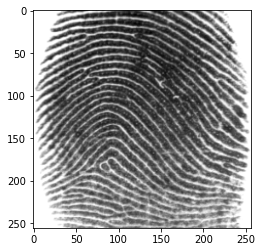

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #BGR -> GRAY 
plt.imshow(img_gray, cmap='gray')

In [ ]:
# Grayscale 변환은 단일 채널로 변환, 단일 채널 이미지를 어느 색상 채널에 매핑해서 출력할지는 matplotlib.pyplot.imshow()이 결정 
# cmap 출력컬러맵 
img_gray.shape 

(256, 256)

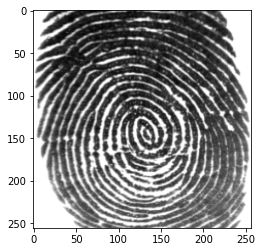

In [ ]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2_gray, cmap='gray')

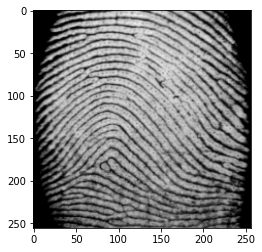

In [ ]:
img = 255 - img
plt.imshow(img)

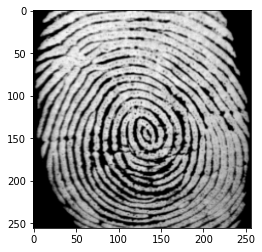

In [ ]:
img2 = 255 - img2
plt.imshow(img2)

In [ ]:
th, dst = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # 127 보다 큰 값만 255로 변경
print(th)

127.0


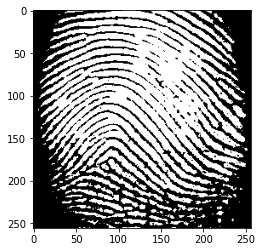

In [ ]:
plt.imshow(dst) # dst.shape (256, 256, 3)

In [ ]:
th2, dst2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY) # 127 보다 큰 값만 255로 변경
print(th2)

127.0


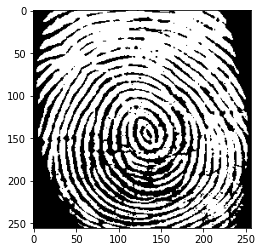

In [ ]:
plt.imshow(dst2)

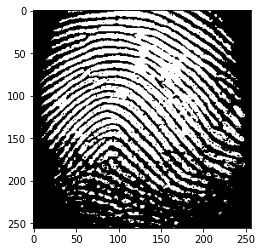

In [ ]:
th, dst = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY) # 임계치 수정 
plt.imshow(dst)

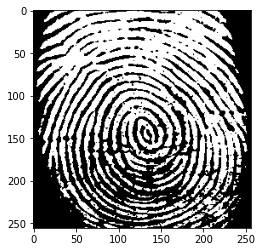

In [ ]:
th2, dst2 = cv2.threshold(img2, 150, 255, cv2.THRESH_BINARY) # 임계치 수정 255로 변경
plt.imshow(dst2)

이진화 방식 변경

In [ ]:
img_m = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/001_00.png', 0)

In [ ]:
img_m.shape

(256, 256)

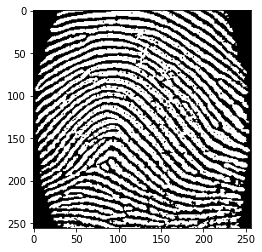

In [ ]:
img_m = cv2.adaptiveThreshold(img_m, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
img_m = 255 - img_m  #이진화 이후 색 반전...?
plt.imshow(img_m,  cmap='gray') 

In [ ]:
img_c = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/001_00.png', 0)
img_c = 255 - img_c

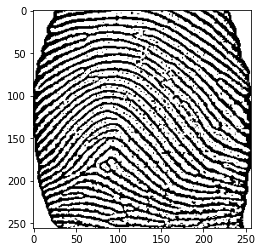

In [ ]:
img_c = cv2.adaptiveThreshold(img_c, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
plt.imshow(img_c,  cmap='gray')

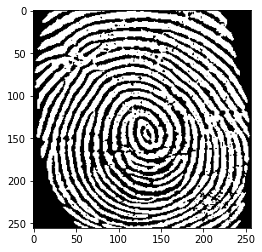

In [ ]:
img2_m = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/002_00.png', 0)
img2_m = cv2.adaptiveThreshold(img2_m, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
img2_m = 255 - img2_m
plt.imshow(img2_m,  cmap='gray')

In [ ]:
img_otsu = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/001_00.png', 0) #THRESH_OTSU를 사용하기 위해 왜 이미지를 읽어올때 0를 쓰는가?
otsu_threshold, image_result = cv2.threshold(img_otsu, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(otsu_threshold)

152.0


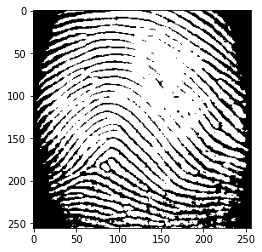

In [ ]:
image_result = 255 - image_result
plt.imshow(image_result, cmap='gray')

In [ ]:
#세션화 

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
img_morph = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel, iterations=1)
img_morph = cv2.morphologyEx(img_morph , cv2.MORPH_OPEN, kernel, iterations=1)

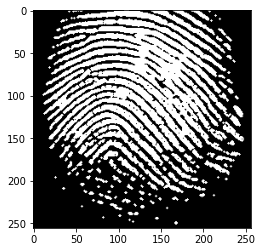

In [ ]:
plt.imshow(img_morph, cmap='gray')

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
img_morph2 = cv2.morphologyEx(dst2, cv2.MORPH_OPEN, kernel, iterations=1)
img_morph2 = cv2.morphologyEx(img_morph2 , cv2.MORPH_OPEN, kernel, iterations=1)

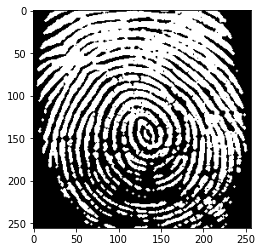

In [ ]:
plt.imshow(img_morph2, cmap='gray')

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
img_morph3 = cv2.morphologyEx(img_m, cv2.MORPH_OPEN, kernel, iterations=1)
img_morph3 = cv2.morphologyEx(img_m , cv2.MORPH_OPEN, kernel, iterations=1)

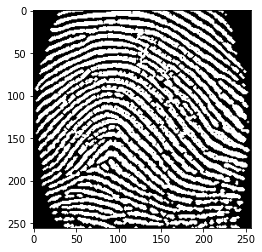

In [ ]:
plt.imshow(img_morph3 , cmap='gray')

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
img_morph4 = cv2.morphologyEx(img2_m, cv2.MORPH_OPEN, kernel, iterations=1)
img_morph4 = cv2.morphologyEx(img2_m , cv2.MORPH_OPEN, kernel, iterations=1)

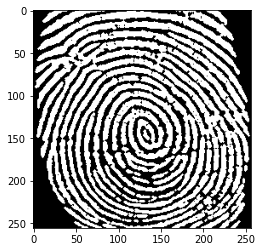

In [ ]:
plt.imshow(img_morph4 , cmap='gray')